In [ ]:
!pip install eo-learn -q

     |████████████████████████████████| 10.5 MB 9.4 MB/s 
     |████████████████████████████████| 69 kB 8.0 MB/s 
     |████████████████████████████████| 201 kB 73.0 MB/s 
     |████████████████████████████████| 133 kB 58.0 MB/s 
     |████████████████████████████████| 131 kB 68.6 MB/s 
     |████████████████████████████████| 1.0 MB 77.3 MB/s 
     |████████████████████████████████| 53.8 MB 138 kB/s 
     |████████████████████████████████| 19.3 MB 380 kB/s 
     |████████████████████████████████| 15.4 MB 41.3 MB/s 
     |████████████████████████████████| 994 kB 40.0 MB/s 
     |████████████████████████████████| 6.3 MB 22.0 MB/s 
     |████████████████████████████████| 3.1 MB 41.3 MB/s 
     |████████████████████████████████| 8.4 MB 11.5 MB/s 
     |████████████████████████████████| 128 kB 59.3 MB/s 
     |████████████████████████████████| 79 kB 8.9 MB/s 
     |████████████████████████████████| 127 kB 64.0 MB/s 
     |████████████████████████████████| 47 kB 5.5 MB/s 
     |█████████████

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
import cv2
import eolearn
import gdown

from eolearn.core import EOPatch, FeatureType

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive #a
drive.mount('/content/drive')

Mounted at /content/drive


# Гиперпараметры

In [ ]:
TARGET_SIZE = (64, 64)

# Загрузка архива

### Разливы

In [ ]:
archive_id = '1pUnNNxtpRFVJWmX4uiudS4mnF1aXfibH'
archivename = gdown.download('https://drive.google.com/uc?id={}'.format(archive_id), None, False)

Downloading...
From: https://drive.google.com/uc?id=1pUnNNxtpRFVJWmX4uiudS4mnF1aXfibH
To: /content/2021-01.zip
100%|██████████| 641M/641M [00:11<00:00, 56.6MB/s]


In [ ]:
!unzip -q {archivename} -d /content/spills2

In [ ]:
# !unzip -q /content/drive/MyDrive/colab_files/final/spills/2021-01.zip -d /content/spills2

In [ ]:
!find . -type f -name *.gz -exec gunzip {} +


gzip: ./non_spills2/2021-16/066d5e49-b109-4bbd-8178-5599e1593620/sentinel2-l2a/patches/64x64-10/2021/timestamp.pkl.gz: unexpected end of file

gzip: ./spills2/2021-01/ПП-2013-198/mask/SNW.npy.gz: unexpected end of file


### Трубопроводы

In [ ]:
archive_id = '1QWV1RHNVwuVzomhyMXVd-Vy2yZjyNMru'
archivename = gdown.download('https://drive.google.com/uc?id={}'.format(archive_id), None, False)

Downloading...
From: https://drive.google.com/uc?id=1QWV1RHNVwuVzomhyMXVd-Vy2yZjyNMru
To: /content/2021-16.zip
100%|██████████| 1.54G/1.54G [00:14<00:00, 106MB/s] 


In [ ]:
# https://drive.google.com/file/d/1QWV1RHNVwuVzomhyMXVd-Vy2yZjyNMru/view?usp=sharing

!unzip -q {archivename} -d /content/non_spills2

In [ ]:
!find . -type f -name *.gz -exec gunzip {} +


gzip: ./non_spills2/2021-16/066d5e49-b109-4bbd-8178-5599e1593620/sentinel2-l2a/patches/64x64-10/2021/timestamp.pkl.gz: unexpected end of file

gzip: ./non_spills2/2021-16/0c395a12-35f0-4944-b4df-f8dfece61d85/sentinel2-l2a/patches/64x64-10/2021/bbox.pkl.gz: unexpected end of file


### СSV

In [ ]:
file_id = '1Eo08JT3zZT8nktTE2Wwqfwng4bpbnNGU'
filename = gdown.download('https://drive.google.com/uc?id={}'.format(file_id), None, False)

Downloading...
From: https://drive.google.com/uc?id=1Eo08JT3zZT8nktTE2Wwqfwng4bpbnNGU
To: /content/clean_pollution.csv
100%|██████████| 650k/650k [00:00<00:00, 4.94MB/s]


# Фильтрация

In [ ]:
csv_bboxes = "1pR_hac5F1cRO-PoUHCypAWdsLvMXItr9"
csv_dates = "1WIJm5FM5SLkBAumwxEKMk6qiV0tPPKxX"

gdown.download('https://drive.google.com/uc?id={}'.format(csv_bboxes), None, False)
gdown.download('https://drive.google.com/uc?id={}'.format(csv_dates), None, False)


Downloading...
From: https://drive.google.com/uc?id=1pR_hac5F1cRO-PoUHCypAWdsLvMXItr9
To: /content/bbox_2021.csv
100%|██████████| 1.18M/1.18M [00:00<00:00, 6.59MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WIJm5FM5SLkBAumwxEKMk6qiV0tPPKxX
To: /content/timestamp_2021.csv
100%|██████████| 9.02M/9.02M [00:00<00:00, 30.8MB/s]


'timestamp_2021.csv'

In [ ]:
df_dates = pd.read_csv('/content/timestamp_2021.csv', index_col=0)
df_bboxes = pd.read_csv('/content/bbox_2021.csv', index_col=0)

In [ ]:
display(df_bboxes.head())
display(df_dates.head())

,dir,name,x1,y1,x2,y2
0,2021-14,РН-ЮНГ-ММ-2018-139,72.941261,60.750928,72.952629,60.756850
1,2021-14,РН-ЮНГ-ММ-2018-130,72.785153,60.816755,72.796515,60.822690
2,2021-14,РН-ЮНГ-ММ-2018-17,72.673212,60.858972,72.684567,60.864917
3,2021-14,РН-ЮНГ-ММ-2017-144,72.672401,60.729528,72.683711,60.735472
4,2021-14,РН-ЮНГ-ММ-2020-128,72.877674,60.644536,72.888993,60.650463


,dir,name,id,date
0,2021-14,РН-ЮНГ-ММ-2018-139,0,2021-02-04 06:42:18+00:00
1,2021-14,РН-ЮНГ-ММ-2018-139,1,2021-03-26 06:42:17+00:00
2,2021-14,РН-ЮНГ-ММ-2018-139,2,2021-04-12 06:32:17+00:00
3,2021-14,РН-ЮНГ-ММ-2018-139,3,2021-05-10 06:42:18+00:00
4,2021-14,РН-ЮНГ-ММ-2018-139,4,2021-05-22 06:32:20+00:00


In [ ]:
df = pd.read_csv('/content/clean_pollution.csv', index_col=0)
df.head()

,cat_pollution,lat,lon,date,cat_ground,square
0,нефть,73.506833,62.592583,2017-02-15 00:00:00,земли лесного фонда,0.1703
1,нефть,73.508194,62.543500,2017-02-15 00:00:00,земли лесного фонда,0.2595
2,нефть,73.347778,62.616667,2019-03-04 00:00:00,земли лесного фонда,0.1559
3,нефть,73.547472,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100
4,нефть,73.983397,62.129353,2021-02-18 00:00:00,земли лесного фонда,0.0050


In [ ]:
df21 = df[df['date'].str.contains('2021').values]
df21['filename'] = ''

for filename in df_bboxes['name'].unique():
    x1, y1, x2, y2 = df_bboxes[df_bboxes['name'] == filename][['x1', 'y1', 'x2', 'y2']].to_numpy()[0]
    current_quadrant = df21['lat'].between(x1, x2) & df21['lon'].between(y1, y2)
    df21['filename'][current_quadrant] = filename
    # break
# df21.to_csv('clean_pollution_w_names_2021.csv')


In [ ]:
df21

,cat_pollution,lat,lon,date,cat_ground,square,filename
3,нефть,73.547472,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100,ЛУК-КГ-2020-1
4,нефть,73.983397,62.129353,2021-02-18 00:00:00,земли лесного фонда,0.0050,ЛУК-КГ-2020-2
5,нефть,74.704083,62.139417,2021-02-18 00:00:00,земли лесного фонда,0.0115,ЛУК-КГ-2020-3
6,нефть,74.724694,62.150389,2021-02-18 00:00:00,земли лесного фонда,0.0042,ЛУК-КГ-2020-5
7,нефть,74.730750,62.152472,2021-02-18 00:00:00,земли лесного фонда,0.0129,ЛУК-КГ-2020-5
...,...,...,...,...,...,...,...
4474,"нефть, нефтепродукты",79.606167,61.044278,2021-03-03 00:00:00,земли лесного фонда,0.0025,ПП-2020-2
4475,"нефть, нефтепродукты",79.595556,61.020556,2021-03-03 00:00:00,земли лесного фонда,0.0038,ПП-2020-3
4476,"нефть, нефтепродукты",79.585278,61.035278,2021-03-03 00:00:00,земли лесного фонда,0.0015,ПП-2020-4
4477,"нефть, нефтепродукты",79.659722,61.061111,2021-03-03 00:00:00,земли лесного фонда,0.0005,ПП-2020-5


In [ ]:
df21['idx'] = 0
df21['idx_max'] = 0
df21_2 = pd.DataFrame(columns=df21.columns)
for filename in df21['filename'].unique():
    spill_date = df21[df21['filename'] == filename]['date'].values[0][:7]
    for i in df_dates[df_dates['name'] == filename][df_dates['date'].str.contains(spill_date)]['id'].to_numpy():
        # print(i)
        row = df21[df21['filename'] == filename]
        row['idx'] = i
        row['idx_max'] = max(df_dates[df_dates['name'] == filename]['id'].to_numpy())
        df21_2 = df21_2.append(row)
    # break
df21_2.head()

,cat_pollution,lat,lon,date,cat_ground,square,filename,idx,idx_max
3,нефть,73.547472,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100,ЛУК-КГ-2020-1,0,18
3,нефть,73.547472,62.557611,2021-02-18 00:00:00,земли лесного фонда,0.0100,ЛУК-КГ-2020-1,1,18
4,нефть,73.983397,62.129353,2021-02-18 00:00:00,земли лесного фонда,0.0050,ЛУК-КГ-2020-2,0,17
40,нефтепродукты,61.043514,63.788392,2021-02-18 00:00:00,земли лесного фонда,0.0064,ЛУК-2020-1,0,15
40,нефтепродукты,61.043514,63.788392,2021-02-18 00:00:00,земли лесного фонда,0.0064,ЛУК-2020-1,1,15


In [ ]:
df21_2.shape

(910, 9)

In [ ]:
df21_2['idx_max'].unique()

array([18, 17, 15, 38, 9, 8, 11, 10, 23, 13, 16, 12, 19, 21, 20, 28, 25,
       27, 6, 29], dtype=object)

In [ ]:
df21_2.to_csv('clean_pollution_w_names_n_idx_2021.csv')
!rm /content/drive/MyDrive/colab_files/final/clean_pollution_w_names_n_idx_2021.csv 
!cp /content/clean_pollution_w_names_n_idx_2021.csv /content/drive/MyDrive/colab_files/final/clean_pollution_w_names_n_idx_2021.csv 

# Сборка датасета

## Функции

In [ ]:
def read_file(item, label):
    eopatch = EOPatch.load(item[0].numpy().decode())
    img = eopatch.data['L2A']
    masks = [eopatch.mask[x] for x in eopatch.mask]
    return np.concatenate([img] + masks, axis=-1), label


In [ ]:
@tf.function()
def augmentation(img, label):
    '''
    Случайное вращение и отражение изображения для аугментации
    '''
    if tf.random.uniform(()) > 0.5:
    # Случайное отражение по горизонтали
        img = tf.image.flip_left_right(img)

    if tf.random.uniform(()) > 0.5:
    # Случайное отражение по вертикали
        img = tf.image.flip_up_down(img)

    if tf.random.uniform(()) > 0.5:
    # Случайное транспонирование
        img = tf.image.transpose(img)

    # if tf.random.uniform(()) > 0.5:
    #     # Вращение
    #     img = rotation(img)

    if tf.random.uniform(()) > 0.1:
    # Зашумление картинки
        img = tf.cast(img, tf.float32) + tf.random.uniform((tf.shape(img)), tf.random.uniform((), .3, .8), 0.99)

    return img, label

## Датасет

In [ ]:
data_list_true = glob.glob('/content/spills2/*/*')
data_labels_true = list(np.ones(len(data_list_true), dtype=np.float32))

data_list_false = glob.glob('/content/non_spills2/*/*')
data_labels_false = list(np.zeros(len(data_list_false), dtype=np.float32))

data_list = data_list_true + data_list_false
data_labels = data_labels_true + data_labels_false

random_choice = np.random.choice(len(data_list), len(data_list), replace=False)
data_list = np.array(data_list)[random_choice]
data_labels = np.array(data_labels)[random_choice]

In [ ]:
random_choise[:10]

array([ 795,  398, 1113,  498,  762,  556,   90, 1157, 1563,  354])

In [ ]:
data_labels[:10]

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 0.], dtype=float32)

In [ ]:
dataset_list = tf.data.Dataset.from_tensor_slices(data_list)
dataset_labels = tf.data.Dataset.from_tensor_slices(data_labels)

dataset = tf.data.Dataset.zip((dataset_list, dataset_labels)).shuffle(512).batch(1)

# функция подгрузки изображений
dataset = dataset.map(
        lambda item, label: tuple(tf.py_function(read_file, [item, label], [tf.float32, tf.float32])))

# слой вращения
rotation = layers.experimental.preprocessing.RandomRotation(factor=0.07)

# функция аугментации изображений
dataset = dataset.map(augmentation, num_parallel_calls=tf.data.AUTOTUNE)

# dataset = dataset.map(lambda item, label: augmentation(item, label), num_parallel_calls=tf.data.AUTOTUNE)

for i, batch in enumerate(dataset):
    print(len(batch))
    print(batch[0].shape)
    if i > 4:
        break

2
(39, 64, 64, 19)
2
(16, 64, 64, 19)
2
(16, 64, 64, 19)
2
(15, 64, 64, 19)
2
(11, 64, 64, 19)
2
(16, 64, 64, 19)


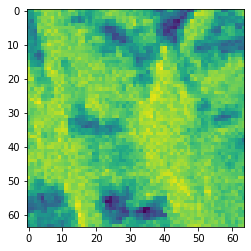

In [ ]:
plt.imshow(batch[0][0, ..., 4])
plt.show()